<img src="logoitam.gif">

# Maestría en Ciencia de Datos
## Redes neuronales
* Machine Learning | 27 de octubre de 2016 |
* Alumnas: 
    - Gabriela Flores Bracamontes | Clave: 160124 |
    - Guillermina Montanari Luján | Clave: 101421 |
    - Paulina Salgado Figueroa    | Clave: 160314 |

### **Objetivo**:
Crear una red neuronal para determinar si los puntos en el plano se encuentran contenidos en un círculo .

### Actividades:

1. Se dermino la topología de la red, para la cual se consideró dos neuronas de entrada y una de salida.
2. Los puntos en el plano se generaron a través de una función uniforme en el intervalo (a,b) definido por el usuario.
3. El criterio para determinar si el punto se encontraba o no dentro del círculo fue a través de la ecuación:
  
   $(x - h)^2 + (y - k)^2  <= r^2$

Donde los puntos (h,k) corresponden al centro del círculo y r es el radio.




  

In [5]:
import tensorflow as tf
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#Definimos los puntos contenidos dentro y fuera del circulo
#
radio=1
datos=1000
C=np.asarray([0,0])
# Se define los puntos en el plano
X=np.random.uniform(low=-1.5,high=1.5, size=(datos,2)) 
#Se calculó la distancia del centro del ciculo C
P=X-C
cuadrado=P*P
suma_c=cuadrado.sum(axis=1)
#Se determina la distancia del centro al punto es mayo al di^metro, si es así el punto se encuentra fuera del circulo
Y=np.where(suma_c<=pow(radio,2),1.,0.)
Y=Y.reshape(datos, 1)


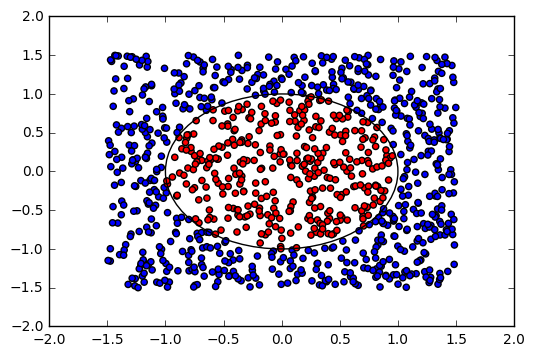

In [8]:
plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
circle = plt.Circle(C, radio,fill=False )
plt.gca().add_patch(circle)

Declaracion de variables

In [10]:
input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x_ = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size])

#Declaración de las neuronas
W_layer1=tf.Variable(tf.random_uniform([input_size,2], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([2]), name="b_layer1")

W_layer2=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")


#Aprendizaje: función de perceptrón y de pérdida

In [11]:
H = tf.nn.sigmoid(tf.matmul(x_,W_layer1)+b_layer1) 
y = tf.nn.sigmoid(tf.matmul(H,W_layer2)+b_layer2) 
loss = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
#cross_entropy = -(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y))
#loss=tf.reduce_mean(cross_entropy)
#train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)



In [12]:
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva


Correr programa

In [13]:
sess.run(init)
for i in range(50000):
     sess.run(train_step, feed_dict={x_: X, y_: Y })

    

In [9]:
#Valores clasificados por la red
Yf=np.round(sess.run(y, feed_dict={x_: X}))

#Cuantificar Error-Accuracy

In [10]:
correct_prediction = tf.equal(tf.round(y),y_) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x_: X, y_: Y}))

0.753


#Visualización del círculo

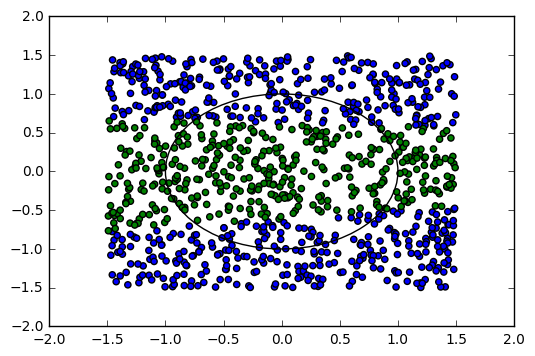

In [11]:
plt.scatter(X[:,0],X[:,1],c=['green' if i==1 else 'blue' for i in Yf])
circle = plt.Circle(C, radio,fill=False )
plt.gca().add_patch(circle)


In [12]:
sess.close()